In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# European Education Data Analysis

This notebook presents an analysis of data derived from [Eurostat](https://ec.europa.eu/eurostat/data/database) that summarises the spending of member states on Education.   The dataset is derived from those downloadable from the Eurostat site but has been pre-processed for use in the text book [Introduction to Data Science](https://www.springer.com/gp/book/9783319500164). 

The data represents the spending on education as a fraction of GDP.

We first load the data and inspect the general shape and columns that are provided.

In [14]:
edufile = 'files/educ_figdp_1_Data.csv'
edu = pd.read_csv(edufile, na_values=':', usecols = ["TIME","GEO","Value"])
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


The first thing we can see is that the data consists of many rows, each representing a value of Educational spending for a given country (or group of countries) in a given year.  For example, the row with index 100 represents the spending by Bulgaria in 2004:

In [3]:
edu.loc[100]

TIME         2004
GEO      Bulgaria
Value         4.4
Name: 100, dtype: object

## Remove NaN Rows

We note that some rows have the value `NaN` (Not a Number) which means they are unknown.  Since we can't do anything useful with these rows we'll just drop them from the DataFrame.  We'll then look at the summary statistics of the remaining data.

In [4]:
edu = edu.dropna()
edu.describe()

,TIME,Value
count,361.000000,361.000000
mean,2005.556787,5.203989
std,3.385051,1.021694
min,2000.000000,2.880000
25%,2003.000000,4.620000
50%,2005.000000,5.060000
75%,2008.000000,5.660000
max,2011.000000,8.810000


We're left with 361 entries.  The `Value` field ranges from 2.88 to 8.81 and has a mean of 5.2.  

## Starting Analysis

Let's now look at the range of countries represented in the data by looking at the unique values of the GEO column:

In [5]:
print(edu.GEO.unique())
print(len(edu.GEO.unique()))

['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (25 countries)' 'Euro area (18 countries)'
 'Euro area (17 countries)' 'Euro area (15 countries)'
 'Euro area (13 countries)' 'Belgium' 'Bulgaria' 'Czech Republic'
 'Denmark' 'Germany (until 1990 former territory of the FRG)' 'Estonia'
 'Ireland' 'Greece' 'Spain' 'France' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland']
32


It contains data on a number of European countries as well as some combined groupings of the EU.  Let's compare some different countries by selecting just the rows for each country and looking at the summary statistics.  For example, comparing Romania and France.

In [6]:
edu_romania = edu[edu.GEO == 'Romania']
edu_romania.describe()

,TIME,Value
count,10.00000,10.000000
mean,2005.20000,3.494000
std,3.88158,0.446448
min,2000.00000,2.880000
25%,2002.25000,3.257500
50%,2004.50000,3.465000
75%,2008.50000,3.525000
max,2011.00000,4.250000


In [7]:
edu_france = edu[edu.GEO == 'France']
edu_france.describe()

,TIME,Value
count,12.000000,12.000000
mean,2005.500000,5.797500
std,3.605551,0.150823
min,2000.000000,5.610000
25%,2002.750000,5.657500
50%,2005.500000,5.830000
75%,2008.250000,5.905000
max,2011.000000,6.040000


The spending in France averages 5.8% of GDP over the reporting period compared with 3.5% for Romania.  We also see that Romania's values are more varied with a standard deviation of 0.45 compared with 0.15 for France.  To get a better picture of the values for each country we can plot them, but we take care to use the same axes for both plots so that we can compare them.

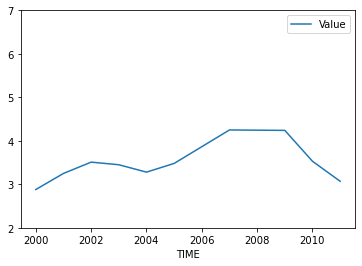

In [8]:
edu_romania.plot(x='TIME', y='Value', ylim=(2,7))

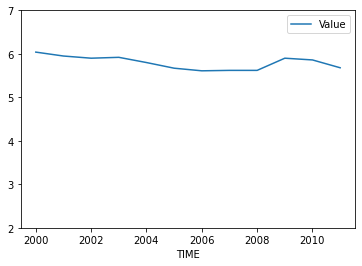

In [9]:
edu_france.plot(x='TIME', y='Value', ylim=(2,7))

## Pivot

An alternate way to look at this data is to arrange it by the GEO column with one column per year.  We can do this using the `pivot` method of the data frame and it makes the table of data much easier to read.

In [10]:
edu_pivot = edu.pivot(index='GEO', columns='TIME')
edu_pivot.head()

Value                                                        \
TIME            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009   
GEO                                                                          
Austria         5.66  5.74  5.68  5.53  5.48  5.44  5.40  5.33  5.47  5.98   
Belgium          NaN  5.99  6.09  6.02  5.95  5.92  5.98  6.00  6.43  6.57   
Bulgaria        3.88  3.70  3.94  4.09  4.40  4.25  4.04  3.88  4.44  4.58   
Cyprus          5.42  5.98  6.60  7.37  6.77  6.95  7.02  6.95  7.45  7.98   
Czech Republic  3.83  3.93  4.15  4.32  4.20  4.08  4.42  4.05  3.92  4.36   

                            
TIME            2010  2011  
GEO                         
Austria         5.91  5.80  
Belgium         6.58  6.55  
Bulgaria        4.10  3.82  
Cyprus          7.92  7.87  
Czech Republic  4.25  4.51

With the data in this form we can generate a composite plot quite easily using the plot method. Unfortunately the default plot puts the rows (GEO) on the x-axis and draws one line per column (year). __This is not that useful__.
 

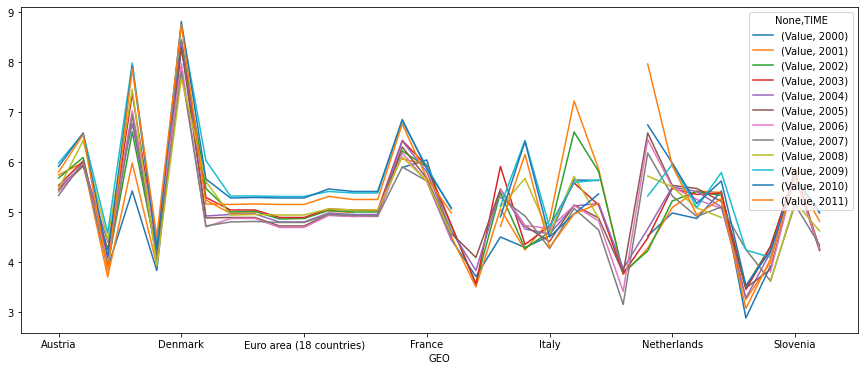

In [11]:
edu_pivot.plot(figsize=(15,6))

To get a more useful plot we can transpose the data frame which flips the rows and columns. We then plot it quite large (using the `figsize` argument) to allow us to see the legend.

In [12]:
edu_pivot.transpose().head()

GEO         Austria  Belgium  Bulgaria  Cyprus  Czech Republic  Denmark  \
      TIME                                                                
Value 2000     5.66      NaN      3.88    5.42            3.83     8.28   
      2001     5.74     5.99      3.70    5.98            3.93     8.44   
      2002     5.68     6.09      3.94    6.60            4.15     8.44   
      2003     5.53     6.02      4.09    7.37            4.32     8.33   
      2004     5.48     5.95      4.40    6.77            4.20     8.43   

GEO         Estonia  Euro area (13 countries)  Euro area (15 countries)  \
      TIME                                                                
Value 2000     5.57                       NaN                       NaN   
      2001     5.24                      4.97                      4.98   
      2002     5.47                      5.00                      5.01   
      2003     5.29                      5.04                      5.04   
      2004     4.92                      4.95                      4.96   

GEO         Euro area (17 countries)  ...  Lithuania  Luxembourg  Malta  \
      TIME                            ...                                 
Value 2000                       NaN  ...       5.63         NaN   4.52   
      2001                       NaN  ...       5.86        3.75   4.27   
      2002                      4.86  ...       5.81        3.79   4.22   
      2003                      4.89  ...       5.14        3.77   4.48   
      2004                      4.80  ...       5.17        3.87   4.66   

GEO         Netherlands  Poland  Portugal  Romania  Slovakia  Slovenia  Spain  
      TIME                                                                     
Value 2000         4.98    4.87      5.42     2.88      3.92       NaN   4.28  
      2001         5.09    5.42      5.39     3.25      3.99      5.86   4.24  
      2002         5.22    5.41      5.33     3.51      4.31      5.76   4.25  
      2003         5.47    5.35      5.38     3.45      4.30      5.80   4.28  
      2004         5.50    5.41      5.10     3.28      4.19      5.74   4.25  

[5 rows x 32 columns]

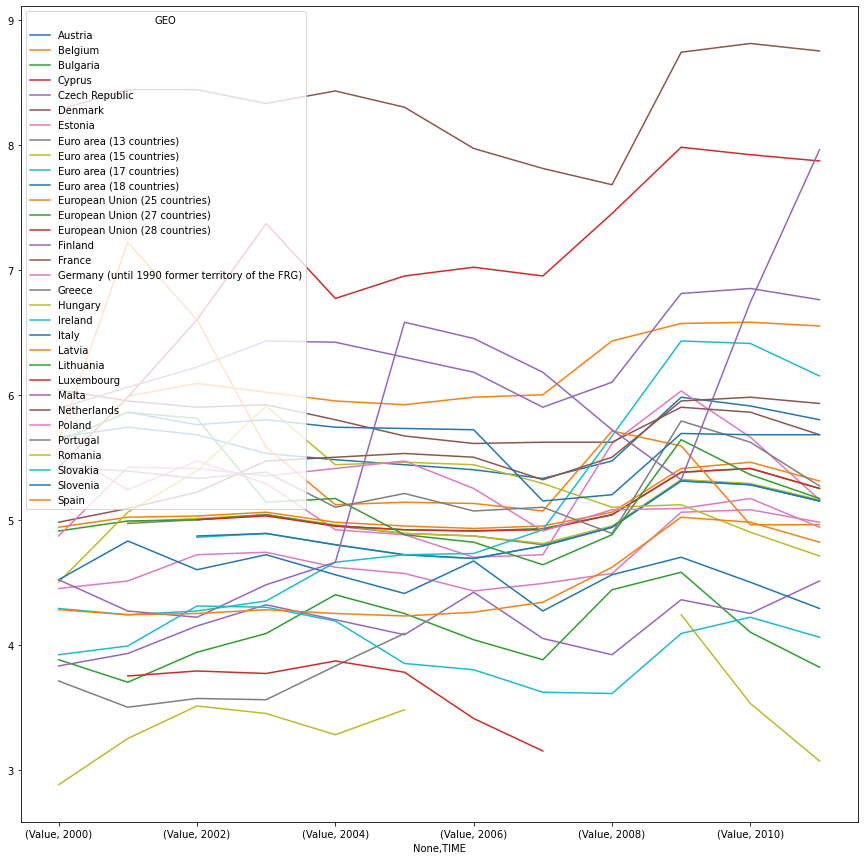

In [13]:
edu_pivot.transpose().plot(figsize=(15,15))

Unfortunately this plot isn't that informative as it is difficult to see which country is which.  The main thing we can see from the plot is that there are big differences between countries and some countries that have changed significantly over the reporting period (eg. the purple line  that starts at 4.5 and ends at 8).  

This completes the exploration of this data set.   We have only just scratched the surface of what it can tell us.